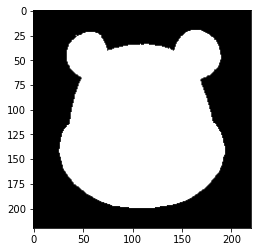

El área de la figura es:  23633.0
La longitud de la frontera es: 692.783832192421


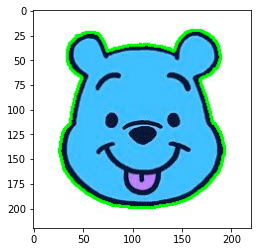

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as inter

puntos_x=[]
puntos_y=[]
k=100


imagen = cv2.imread("C:\\Users\\alega\\Downloads\\poo.jpg")
#Convertir la imagen original a tonos de grises
gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
#Convertir la imagen de los grises a binaria 
_,binaria = cv2.threshold(gray,225,255,cv2.THRESH_BINARY_INV)
plt.imshow(binaria,cmap="gray")
plt.show()
#Establecer los puntos necesarios y a partir de ellos trazar el contorno de la imagen 
contornos,_=cv2.findContours(binaria,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
imagen=cv2.drawContours(imagen,contornos,-1,(0,255,0),2)

#Calcular el area y longitud de la frontera
for c in contornos:
    area=cv2.contourArea(c)
    perimetro = cv2.arcLength(c,True)
    print ("El área de la figura es: ", area)
    print("La longitud de la frontera es:",perimetro)
    
#Imprimir todos los puntos seleccionados previamente, es opcional
#print(contornos)


plt.imshow(imagen)
plt.show()


Área de la figura: 24201.96451355092
Longitud de la frontera: 714.2760528225257


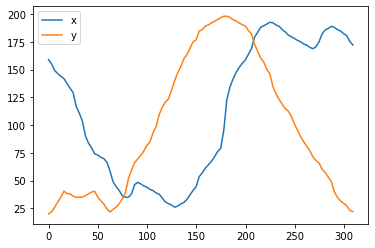

In [2]:
#Obtener conjuntos con puntos x y y 

just=len(contornos[0])
i=0
while i<just:
    equis=contornos[0][i][0][0]
    puntos_x.append(equis)
    ye=contornos[0][i][0][1]
    puntos_y.append(ye)
    i=i+1
num=np.arange(just)

#Construcción de los splines 
splinex=inter.make_interp_spline(num,puntos_x)
spliney=inter.make_interp_spline(num,puntos_y)
li=np.arange(min(num), max(num), (max(num)-min(num))/k).tolist()
plt.plot(li,splinex(li), label='x')
plt.plot(li,spliney(li), label='y')
plt.legend()

#Calcular el área 
t_fino = np.linspace(0, len(puntos_x), 1000)
area = 0.5 * np.sum(splinex(t_fino[:-1]) * np.diff(spliney(t_fino)) - spliney(t_fino[:-1]) * np.diff(splinex(t_fino)))

# Calcular la longitud de la frontera
longitud = np.sum(np.sqrt(np.diff(splinex(t_fino))**2 + np.diff(spliney(t_fino))**2))

print("Área de la figura:", np.abs(area))
print("Longitud de la frontera:", longitud)
